In [1]:
%load_ext autoreload
%autoreload 2

# %matplotlib notebook

import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

import sys

sys.path.append("incl/")

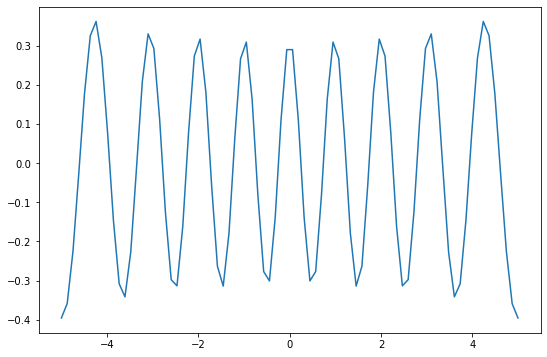

In [2]:
from scipy.special import eval_hermite

def get_N(n):
    return 1./np.sqrt(np.sqrt(np.pi)*2**n*np.math.factorial(n))

x = np.linspace(-5,5,80)

n = 20

h = eval_hermite(n,x)

H = get_N(n) * h * np.exp(-0.5*x**2)


plt.plot(x,H)
plt.show()

In [3]:

x = np.linspace(-100,100,10001)
x = x[1:]
dx = x[1]-x[0]

# print(x)

n1 = 80
n2 = 80

inner = get_N(n1)*eval_hermite(n1,x) @ ( get_N(n2)*eval_hermite(n2,x) * np.exp(-x**2) * dx)

print(inner)


1.0000000000005225


In [4]:
import ELPH_utils
runs = ELPH_utils.load_runs(filename='../runs_rand_inits.npz')
# runs = runs[:100:1]

n_runs = len(runs)
n_kmax = runs[0].shape[0]

print(n_runs, 'loaded with n_kmax =', n_kmax)

data_matrix = np.concatenate(runs, axis=1)

500 loaded with n_kmax = 80


H matrix rank: 54
(80, 400)
(80, 400)


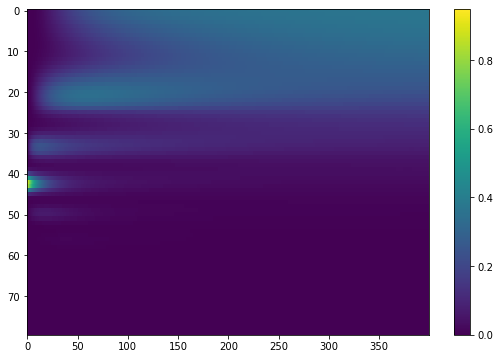

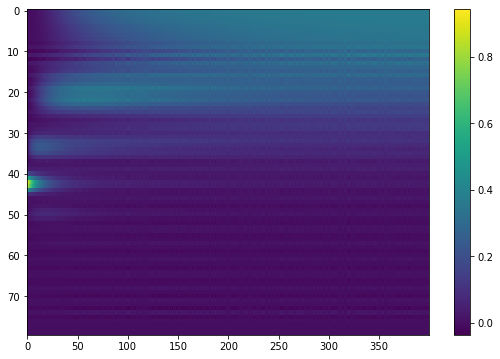

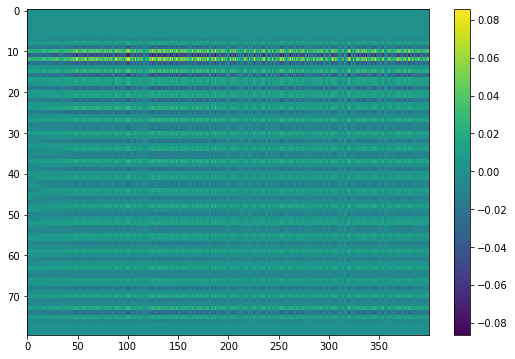

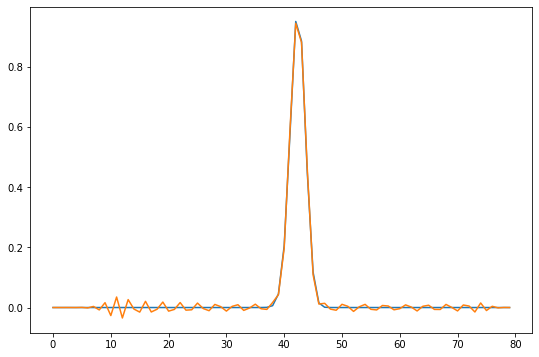

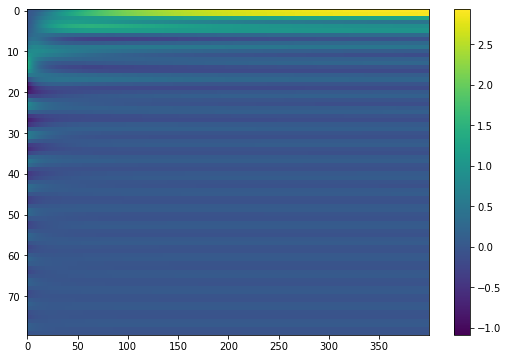

In [22]:
from ELPH_Dim_Reducer import Hermite

k = np.linspace(0,9.0,80)
HermiteReducer = Hermite(k)

HermiteReducer.train(data_matrix)

# plt.plot(HermiteReducer.H_matrix[79])
# plt.show()

print('H matrix rank:', np.linalg.matrix_rank(HermiteReducer.H_matrix))

test = runs[85]

red_coef_matrix = HermiteReducer.reduce(test,80)
print(red_coef_matrix.shape)

recon = HermiteReducer.expand(red_coef_matrix)
print(recon.shape)

plt.imshow(test, aspect='auto', interpolation='none')
plt.colorbar()
plt.show()

plt.imshow(recon, aspect='auto', interpolation='none')
plt.colorbar()
plt.show()

plt.imshow(test - recon, aspect='auto', interpolation='none')
plt.colorbar()
plt.show()

plt.plot(test[:,0])
plt.plot(recon[:,0])
plt.show()


plt.imshow(red_coef_matrix, aspect='auto', interpolation='none')
plt.colorbar()
plt.show()